## KNAPSACK PROBLEM

Para esse problema, foi considerado um _array_ para os volumes e outro para os valores. Cada indivíduo da população é um _array_ de tamanho 17 sendo cada elemento um objeto colocado ou não. Ou seja, se "1", o objeto foi inserido, se "0", ele não foi inserido. Há uma restrição para esses objetos, a qual define um volume máximo dado pela soma dos volumes de cada mochila. Isto é, se o volume dos objetos colocados ultrapassar o volume total, significa que não há uma combinação possível de objetos na qual todos os objetos cabem nas 3 mochilas.

Sendo assim, ao final dos testes, colocamos no relatório os resultados para uma população de 50 indivíduos. A função de recombinação é _one-point crossover_, a de mutação é _bit-flipping_ (com taxa de mutação de 1%), a de seleção de pais e de prole é _fitness proportional selection_.

In [1]:
from utils.de         import DifferentialEvolution
from utils.eda        import CompactGA 
from utils.statistics import Statistics
from functions        import *

import matplotlib.pyplot as plt

from utils.GA import GA
from utils.GA import Model as ModelGA
import numpy as np
from utils.ES import ES
from utils.ES import Model as ModelES

import time

In [2]:
VM1 = 13
VM2 = 9
VM3 = 7

OBJECTS_VOLUME = np.array([3,2,1,2.2,1.4,3.8,0.2,0.1,0.13, 2.8, 1.5, 2, 3.1, 1.2, 1.7, 1.1, 0.3])
OBJECTS_VALUE = np.array([3, 2, 1, 2, 1, 4, 1, 1, 1, 3, 2, 2, 3, 1, 3, 2, 1])



def knapsack_problem(x):
    while(sum(x[0:17]*OBJECTS_VOLUME) > VM1+VM2+VM3):
        x[np.random.randint(low=0,high=17)] = 0
    
    return sum(x[0:17]*OBJECTS_VALUE)

In [7]:
pop = np.random.randint(low=0,high=2, size=(50,17))
model = ModelGA(
    pop,
    knapsack_problem, 
    "one-point-crossover", 
    "bit-flipping",
    "fitness proportional selection",
    "fitness proportional selection",
    0.01,
    50,
    1,
    0,
    1)
    
ga_alg = GA(model)
ga_alg.run(model)

O gráfico abaixo ilustra a convergência do melhor indivíduo de cada geração ao longo das gerações. Pode-se ver que ele chega ao ótimo antes de atingir 50 gerações, mas tem algumas quedas, só se mantendo com uma certa constância a partir de 40 gerações.

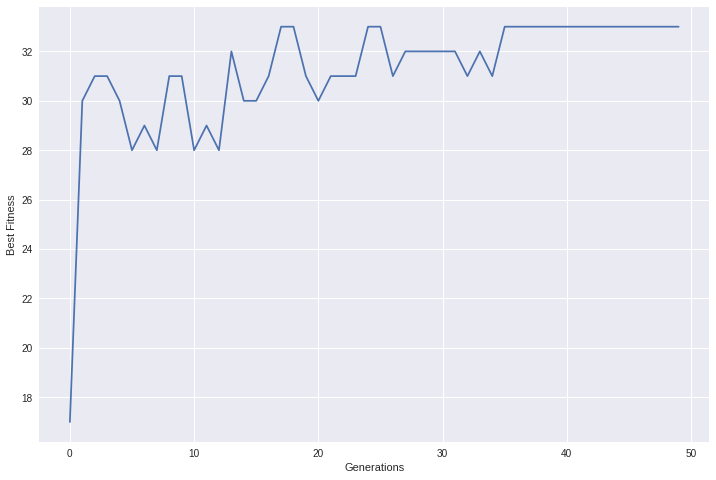

In [10]:
x = range(0,50)
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x, model.fitness)
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()

In [19]:
all_best_solutions = []
all_execution_time = []

for i in range(30):
    model.reset()
    start = time.time();
    ga_alg.run(model)
    stop = time.time();
    all_best_solutions.append(model.best_solution)
    all_execution_time.append(start-stop)

Rodando o algorítmo 30 vezes, o indivíduo da última geração, assim como o tempo de processamento, de cada execução foi armazenado em um vetor. Assim, extraímos dos dados desses indivíduos a média, a variância e o desvio padrão. Como é mostrado abaixo, a média foi de aproximadamente "32,37" com um desvio padrão de "0,75". Além disso, é plotado o gráfico de tempo de processamento, que como se pode ver, ficou maior parte do tempo em torno de 0,1 s.

Sendo assim, pode-se dizer que o tempo de convergência é razoávelmente rápido, assim como o desvio padrão não é alto. Quanto ao desvio padrão, deve-se ter em mente que os valores são discretos, assim, a menor variação que se pode ter é 1. Assim, pelo valor da média e desvio padrão, pode-se chegar a conclusão que os valores dos melhores indivíduos variaram entre 32 e 33, sendo a maior parte do tempo, 32.

In [20]:
statistics = Statistics(all_best_solutions)
print('Mean: {}'.format(statistics.mean))
print('Variance: {}'.format(statistics.variance))
print('Standard Deviation: {}'.format(statistics.standard_deviation))

Mean: 32.36666666666667
Variance: 0.5655555555555554
Standard Deviation: 0.752034278178565


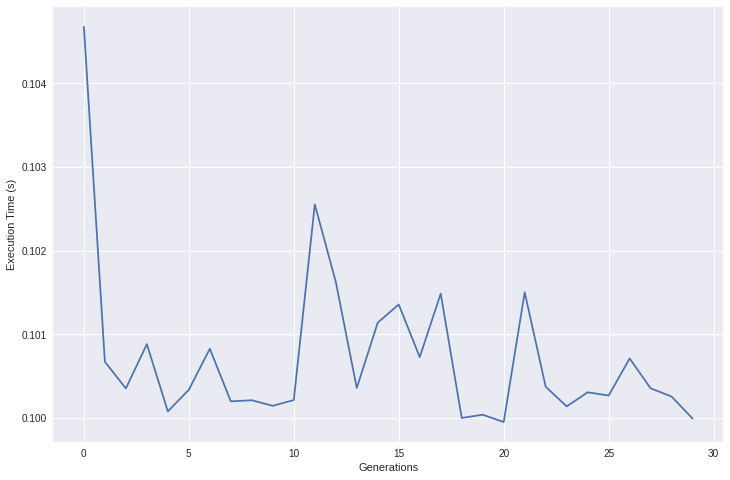

In [21]:
plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.plot(x[0:30],np.abs(all_execution_time))
plt.xlabel('Generations')
plt.ylabel('Execution Time (s)')
plt.show()